# Preprocess pm25 data

In [37]:
import pandas as pd
import numpy as np
import glob
from datetime import datetime

In [43]:
def parser(x, y):
    return datetime.strptime(x + y, '%Y%m%d%H')

df = pd.read_csv('data/beijing_20160101-20161231/beijing_all_20160101.csv', parse_dates={'Timestamp':['date', 'hour']}, index_col=0, date_parser=parser)

In [44]:
df

,type,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,北部新区,植物园,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,PM2.5,200.0,193.0,183.0,195.0,209,218.0,155.0,201.0,84,...,57.0,201.0,316.0,305.0,348.0,205.0,204.0,214,236.0,250.0
2016-01-01 00:00:00,PM2.5_24h,70.0,64.0,63.0,68.0,65,68.0,75.0,120.0,58,...,29.0,75.0,156.0,169.0,197.0,77.0,80.0,74,80.0,81.0
2016-01-01 00:00:00,PM10,209.0,209.0,244.0,200.0,268,NaN,166.0,250.0,118,...,NaN,NaN,NaN,378.0,NaN,214.0,213.0,276,271.0,271.0
2016-01-01 00:00:00,PM10_24h,110.0,139.0,123.0,148.0,189,NaN,98.0,170.0,98,...,NaN,NaN,NaN,283.0,NaN,110.0,128.0,112,119.0,151.0
2016-01-01 00:00:00,AQI,94.0,95.0,87.0,100.0,120,92.0,100.0,150.0,72,...,67.0,100.0,206.0,219.0,247.0,104.0,107.0,99,107.0,108.0
2016-01-01 01:00:00,PM2.5,193.0,183.0,193.0,190.0,211,251.0,141.0,178.0,102,...,57.0,252.0,307.0,318.0,328.0,200.0,195.0,227,201.0,281.0
2016-01-01 01:00:00,PM2.5_24h,77.0,72.0,70.0,76.0,73,77.0,80.0,123.0,63,...,31.0,84.0,163.0,180.0,200.0,85.0,87.0,82,87.0,92.0
2016-01-01 01:00:00,PM10,203.0,187.0,233.0,203.0,248,NaN,145.0,207.0,134,...,NaN,NaN,NaN,388.0,NaN,207.0,211.0,267,221.0,311.0
2016-01-01 01:00:00,PM10_24h,116.0,143.0,132.0,153.0,195,NaN,102.0,170.0,100,...,NaN,NaN,NaN,291.0,NaN,119.0,133.0,120,128.0,160.0


In [45]:
pm25 = df.loc[df['type'] == 'PM2.5']

In [46]:
pm25

,type,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,北部新区,植物园,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,PM2.5,200.0,193.0,183.0,195.0,209,218.0,155.0,201.0,84,...,57.0,201.0,316.0,305.0,348.0,205.0,204.0,214,236.0,250.0
2016-01-01 01:00:00,PM2.5,193.0,183.0,193.0,190.0,211,251.0,141.0,178.0,102,...,57.0,252.0,307.0,318.0,328.0,200.0,195.0,227,201.0,281.0
2016-01-01 02:00:00,PM2.5,219.0,178.0,181.0,205.0,167,233.0,121.0,169.0,106,...,60.0,239.0,297.0,331.0,326.0,213.0,214.0,196,203.0,283.0
2016-01-01 03:00:00,PM2.5,187.0,195.0,148.0,199.0,136,200.0,119.0,165.0,115,...,74.0,234.0,311.0,327.0,299.0,197.0,210.0,148,211.0,254.0
2016-01-01 04:00:00,PM2.5,160.0,179.0,111.0,146.0,108,220.0,121.0,179.0,125,...,80.0,233.0,273.0,287.0,220.0,152.0,162.0,109,168.0,273.0
2016-01-01 05:00:00,PM2.5,116.0,134.0,94.0,111.0,93,204.0,118.0,173.0,121,...,78.0,236.0,305.0,264.0,159.0,108.0,120.0,103,127.0,240.0
2016-01-01 06:00:00,PM2.5,111.0,103.0,95.0,95.0,107,168.0,92.0,165.0,125,...,79.0,238.0,300.0,237.0,143.0,98.0,105.0,99,108.0,203.0
2016-01-01 07:00:00,PM2.5,124.0,102.0,94.0,108.0,113,121.0,94.0,156.0,121,...,79.0,231.0,289.0,226.0,153.0,104.0,111.0,111,110.0,186.0
2016-01-01 08:00:00,PM2.5,106.0,109.0,100.0,113.0,89,117.0,110.0,164.0,112,...,85.0,236.0,274.0,289.0,171.0,112.0,125.0,116,122.0,164.0


In [47]:
path1 = 'data/beijing_20160101-20161231/'
path2 = 'data/beijing_20170101-20171231/'
allfiles = glob.glob(path1 + 'beijing_all*.csv') + glob.glob(path2 + 'beijing_all*.csv')
df_list = []
data = pd.DataFrame()
for file in allfiles:
    try:
        print(file)
        df = pd.read_csv(file, parse_dates={'Timestamp':['date', 'hour']}, index_col = 0, date_parser=parser)
        pm25 = df.loc[df['type'] == 'PM2.5']
        df_list.append(pm25['东四'])
    except (pd.errors.EmptyDataError, ValueError) as e:
        print(e)
data = pd.concat(df_list)

data/beijing_20160101-20161231/beijing_all_20161226.csv
data/beijing_20160101-20161231/beijing_all_20160104.csv
data/beijing_20160101-20161231/beijing_all_20160110.csv
data/beijing_20160101-20161231/beijing_all_20161024.csv
data/beijing_20160101-20161231/beijing_all_20161030.csv
data/beijing_20160101-20161231/beijing_all_20160306.csv
data/beijing_20160101-20161231/beijing_all_20161018.csv
data/beijing_20160101-20161231/beijing_all_20160312.csv
data/beijing_20160101-20161231/beijing_all_20160528.csv
data/beijing_20160101-20161231/beijing_all_20160514.csv
data/beijing_20160101-20161231/beijing_all_20160716.csv
data/beijing_20160101-20161231/beijing_all_20160702.csv
data/beijing_20160101-20161231/beijing_all_20160925.csv
data/beijing_20160101-20161231/beijing_all_20160919.csv
data/beijing_20160101-20161231/beijing_all_20160918.csv
data/beijing_20160101-20161231/beijing_all_20160924.csv
data/beijing_20160101-20161231/beijing_all_20160930.csv
data/beijing_20160101-20161231/beijing_all_20160

data/beijing_20160101-20161231/beijing_all_20160808.csv
data/beijing_20160101-20161231/beijing_all_20160820.csv
data/beijing_20160101-20161231/beijing_all_20160411.csv
data/beijing_20160101-20161231/beijing_all_20160405.csv
data/beijing_20160101-20161231/beijing_all_20160203.csv
data/beijing_20160101-20161231/beijing_all_20161109.csv
data/beijing_20160101-20161231/beijing_all_20160217.csv
data/beijing_20160101-20161231/beijing_all_20161121.csv
data/beijing_20160101-20161231/beijing_all_20161120.csv
data/beijing_20160101-20161231/beijing_all_20160216.csv
data/beijing_20160101-20161231/beijing_all_20161108.csv
data/beijing_20160101-20161231/beijing_all_20160202.csv
data/beijing_20160101-20161231/beijing_all_20160404.csv
data/beijing_20160101-20161231/beijing_all_20160410.csv
data/beijing_20160101-20161231/beijing_all_20160821.csv
data/beijing_20160101-20161231/beijing_all_20160809.csv
data/beijing_20160101-20161231/beijing_all_20160606.csv
data/beijing_20160101-20161231/beijing_all_20160

data/beijing_20160101-20161231/beijing_all_20160916.csv
data/beijing_20160101-20161231/beijing_all_20160917.csv
data/beijing_20160101-20161231/beijing_all_20160903.csv
data/beijing_20160101-20161231/beijing_all_20160718.csv
data/beijing_20160101-20161231/beijing_all_20160730.csv
data/beijing_20160101-20161231/beijing_all_20160724.csv
data/beijing_20160101-20161231/beijing_all_20160526.csv
data/beijing_20160101-20161231/beijing_all_20161002.csv
data/beijing_20160101-20161231/beijing_all_20161016.csv
data/beijing_20160101-20161231/beijing_all_20160308.csv
data/beijing_20160101-20161231/beijing_all_20160320.csv
data/beijing_20160101-20161231/beijing_all_20161214.csv
data/beijing_20160101-20161231/beijing_all_20160122.csv
data/beijing_20160101-20161231/beijing_all_20161228.csv
data/beijing_20160101-20161231/beijing_all_20160120.csv
data/beijing_20160101-20161231/beijing_all_20161202.csv
data/beijing_20160101-20161231/beijing_all_20161216.csv
data/beijing_20160101-20161231/beijing_all_20160

data/beijing_20170101-20171231/beijing_all_20170214.csv
data/beijing_20170101-20171231/beijing_all_20170215.csv
data/beijing_20170101-20171231/beijing_all_20170201.csv
data/beijing_20170101-20171231/beijing_all_20171123.csv
data/beijing_20170101-20171231/beijing_all_20170822.csv
data/beijing_20170101-20171231/beijing_all_20170605.csv
data/beijing_20170101-20171231/beijing_all_20170611.csv
data/beijing_20170101-20171231/beijing_all_20170407.csv
data/beijing_20170101-20171231/beijing_all_20170413.csv
data/beijing_20170101-20171231/beijing_all_20170405.csv
data/beijing_20170101-20171231/beijing_all_20170411.csv
data/beijing_20170101-20171231/beijing_all_20170607.csv
data/beijing_20170101-20171231/beijing_all_20170613.csv
data/beijing_20170101-20171231/beijing_all_20170820.csv
data/beijing_20170101-20171231/beijing_all_20170808.csv
data/beijing_20170101-20171231/beijing_all_20171121.csv
data/beijing_20170101-20171231/beijing_all_20170217.csv
data/beijing_20170101-20171231/beijing_all_20171

data/beijing_20170101-20171231/beijing_all_20171203.csv
data/beijing_20170101-20171231/beijing_all_20171217.csv
data/beijing_20170101-20171231/beijing_all_20170109.csv
data/beijing_20170101-20171231/beijing_all_20170323.csv
data/beijing_20170101-20171231/beijing_all_20171029.csv
data/beijing_20170101-20171231/beijing_all_20171001.csv
data/beijing_20170101-20171231/beijing_all_20171015.csv
data/beijing_20170101-20171231/beijing_all_20171003.csv
data/beijing_20170101-20171231/beijing_all_20171017.csv
data/beijing_20170101-20171231/beijing_all_20170309.csv
data/beijing_20170101-20171231/beijing_all_20170321.csv
data/beijing_20170101-20171231/beijing_all_20171201.csv
data/beijing_20170101-20171231/beijing_all_20171215.csv
data/beijing_20170101-20171231/beijing_all_20170123.csv
data/beijing_20170101-20171231/beijing_all_20171229.csv
data/beijing_20170101-20171231/beijing_all_20170719.csv
data/beijing_20170101-20171231/beijing_all_20170731.csv
data/beijing_20170101-20171231/beijing_all_20170

In [54]:
pd.read_csv('pm25.csv', parse_dates=True, index_col=0, header=None)

,1
0,
2016-12-26 00:00:00,165.0
2016-12-26 01:00:00,164.0
2016-12-26 02:00:00,156.0
2016-12-26 03:00:00,165.0
2016-12-26 04:00:00,139.0
2016-12-26 05:00:00,72.0
2016-12-26 06:00:00,30.0
2016-12-26 07:00:00,25.0
2016-12-26 08:00:00,24.0


# Preprocess nc file

In [18]:
from netCDF4 import Dataset, num2date

In [4]:
nc_data = Dataset("test.nc", "r", format="NETCDF4")

In [8]:
nc_data.variables['longitude'][:]

array([115.   , 115.125, 115.25 , 115.375, 115.5  , 115.625, 115.75 ,
       115.875, 116.   , 116.125, 116.25 , 116.375, 116.5  , 116.625,
       116.75 , 116.875, 117.   ], dtype=float32)

In [12]:
nc_data.variables['time'][:]

array([1016832, 1016838, 1016844, ..., 1034358, 1034364, 1034370],
      dtype=int32)

In [17]:
print(nc_data.variables['time'].units)

hours since 1900-01-01 00:00:0.0


In [35]:
times = num2date(nc_data.variables['time'][:], nc_data.variables['time'].units)

In [21]:
print(nc_data.variables['t2m'].dimensions)

('time', 'latitude', 'longitude')


In [22]:
nc_data.variables['t2m'][:].shape

(2924, 17, 17)

In [27]:
nc_data.variables['longitude'][:][11]

116.375

In [33]:
nc_data.variables['latitude'][:][9]

39.875

In [34]:
nc_data.variables['t2m'][:, 9, 11]

array([266.15869676, 277.57201342, 271.10950286, ..., 277.34280944,
       270.39063581, 266.95570153])

In [38]:
t2m = pd.Series(nc_data.variables['t2m'][:, 9, 11], index=times)

In [42]:
t2m.shift(8, freq = 'H')

2016-01-01 08:00:00    266.158697
2016-01-01 14:00:00    277.572013
2016-01-01 20:00:00    271.109503
2016-01-02 02:00:00    266.704619
2016-01-02 08:00:00    266.042011
2016-01-02 14:00:00    279.451486
2016-01-02 20:00:00    273.128582
2016-01-03 02:00:00    268.245495
2016-01-03 08:00:00    267.091140
2016-01-03 14:00:00    276.285346
2016-01-03 20:00:00    271.418928
2016-01-04 02:00:00    268.203821
2016-01-04 08:00:00    266.343102
2016-01-04 14:00:00    273.387999
2016-01-04 20:00:00    269.832212
2016-01-05 02:00:00    265.689870
2016-01-05 08:00:00    263.024853
2016-01-05 14:00:00    271.931512
2016-01-05 20:00:00    267.102600
2016-01-06 02:00:00    264.495926
2016-01-06 08:00:00    264.040644
2016-01-06 14:00:00    274.030812
2016-01-06 20:00:00    269.879094
2016-01-07 02:00:00    266.054513
2016-01-07 08:00:00    264.280266
2016-01-07 14:00:00    271.823161
2016-01-07 20:00:00    267.016128
2016-01-08 02:00:00    265.430453
2016-01-08 08:00:00    264.135451
2016-01-08 14:

In [77]:
pm25_data = pd.read_csv('pm25.csv', parse_dates=True, index_col=0, header=None)

t2m = pd.Series(nc_data.variables['t2m'][:, 9, 11], index=times)
# shift time zone
t2m = t2m.shift(8, freq='H')
d2m = pd.Series(nc_data.variables['d2m'][:, 9, 11], index=times)
d2m = d2m.shift(8, freq='H')
u10 = pd.Series(nc_data.variables['u10'][:, 9, 11], index=times)
u10 = u10.shift(8, freq='H')
v10 = pd.Series(nc_data.variables['v10'][:, 9, 11], index=times)
v10 = v10.shift(8, freq='H')
# concatenate all the series
raw_data = pd.concat([pm25_data, t2m, d2m, u10, v10], axis=1).dropna()

In [78]:
# rename columns
raw_data.columns = ['pm25', 't2m', 'd2m', 'u10', 'v10']
raw_data

,pm25,t2m,d2m,u10,v10
2016-01-01 08:00:00,106.0,266.158697,262.942797,0.610000,-0.854401
2016-01-01 14:00:00,172.0,277.572013,265.854378,0.539951,0.014327
2016-01-01 20:00:00,260.0,271.109503,266.588183,1.231592,-0.007235
2016-01-02 02:00:00,306.0,266.704619,264.173029,0.891609,-1.404387
2016-01-02 08:00:00,195.0,266.042011,262.649275,0.834297,-1.433449
2016-01-02 14:00:00,210.0,279.451486,266.322240,-0.287542,-0.858151
2016-01-02 20:00:00,416.0,273.128582,265.770655,-0.589317,-1.276265
2016-01-03 02:00:00,482.0,268.245495,264.837886,-0.198389,-1.861250
2016-01-03 08:00:00,178.0,267.091140,264.431092,-0.402167,-1.321264
2016-01-03 14:00:00,119.0,276.285346,265.808084,-0.042372,-1.107519


# LSTM 

In [82]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt

/Users/luoweimeng/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [85]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [89]:
values = raw_data.values
# ensure all data is float
values = values.astype('float32')
# normalize features (2668, 5)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours, 用前lag_hours来预测后predict_hours
lag_hours = 8
predict_hours = 3
n_features = 5
# frame as supervised learning
reframed = series_to_supervised(scaled, lag_hours, predict_hours)
reframed

,var1(t-8),var2(t-8),var3(t-8),var4(t-8),var5(t-8),var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),...,var1(t+1),var2(t+1),var3(t+1),var4(t+1),var5(t+1),var1(t+2),var2(t+2),var3(t+2),var4(t+2),var5(t+2)
8,0.153046,0.198574,0.374091,0.558573,0.512661,0.251114,0.406248,0.425272,0.554446,0.568088,...,0.172363,0.382836,0.424458,0.520143,0.496511,0.350669,0.294288,0.428579,0.522122,0.540633
9,0.251114,0.406248,0.425272,0.554446,0.568088,0.381872,0.288658,0.438171,0.595190,0.566712,...,0.350669,0.294288,0.428579,0.522122,0.540633,0.368499,0.235787,0.380047,0.556551,0.449139
10,0.381872,0.288658,0.438171,0.595190,0.566712,0.450223,0.208508,0.395717,0.575162,0.477570,...,0.368499,0.235787,0.380047,0.556551,0.449139,0.010401,0.201930,0.309111,0.534773,0.440087
11,0.450223,0.208508,0.395717,0.575162,0.477570,0.285290,0.196451,0.368931,0.571786,0.475716,...,0.010401,0.201930,0.309111,0.534773,0.440087,0.014859,0.330117,0.285789,0.546923,0.433866
12,0.285290,0.196451,0.368931,0.571786,0.475716,0.307578,0.440446,0.433496,0.505700,0.512421,...,0.014859,0.330117,0.285789,0.546923,0.433866,0.022288,0.265417,0.265565,0.514203,0.419352
13,0.307578,0.440446,0.433496,0.505700,0.512421,0.613670,0.325396,0.423800,0.487923,0.485744,...,0.022288,0.265417,0.265565,0.514203,0.419352,0.008915,0.190044,0.192985,0.526103,0.457652
14,0.613670,0.325396,0.423800,0.487923,0.485744,0.711738,0.236545,0.407403,0.510952,0.448421,...,0.008915,0.190044,0.192985,0.526103,0.457652,0.011887,0.141551,0.182613,0.574349,0.481637
15,0.711738,0.236545,0.407403,0.510952,0.448421,0.260030,0.215540,0.400253,0.498948,0.482873,...,0.011887,0.141551,0.182613,0.574349,0.481637,0.032689,0.303615,0.222678,0.668716,0.507756
16,0.260030,0.215540,0.400253,0.498948,0.482873,0.172363,0.382836,0.424458,0.520143,0.496511,...,0.032689,0.303615,0.222678,0.668716,0.507756,0.126300,0.215749,0.274742,0.675969,0.546634
17,0.172363,0.382836,0.424458,0.520143,0.496511,0.350669,0.294288,0.428579,0.522122,0.540633,...,0.126300,0.215749,0.274742,0.675969,0.546634,0.059435,0.168319,0.239248,0.592293,0.472546


In [140]:
# split into train and test sets
values = reframed.values
# Use data of one year as training set
n_train_samples = 1000
n_test_samples = 500
train = values[:n_train_samples, :]
test = values[-n_test_samples:, :]
# split into input and outputs
train_X, train_y = train[:, :lag_hours * n_features], train[:, [-n_features * 3, -n_features * 2, -n_features]]
test_X, test_y = test[:, :lag_hours * n_features], test[:, [-n_features * 3, -n_features * 2, -n_features]]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], lag_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], lag_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1000, 40) 1000 (1000, 3)
(1000, 8, 5) (1000, 3) (500, 8, 5) (500, 3)


In [107]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(predict_hours))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 1000 samples, validate on 500 samples
Epoch 1/100
 - 1s - loss: 0.0819 - val_loss: 0.1059
Epoch 2/100
 - 0s - loss: 0.0878 - val_loss: 0.0708
Epoch 3/100
 - 0s - loss: 0.0749 - val_loss: 0.0594
Epoch 4/100
 - 0s - loss: 0.0653 - val_loss: 0.0620
Epoch 5/100
 - 0s - loss: 0.0627 - val_loss: 0.0549
Epoch 6/100
 - 0s - loss: 0.0603 - val_loss: 0.0548
Epoch 7/100
 - 0s - loss: 0.0593 - val_loss: 0.0545
Epoch 8/100
 - 1s - loss: 0.0584 - val_loss: 0.0538
Epoch 9/100
 - 0s - loss: 0.0578 - val_loss: 0.0527
Epoch 10/100
 - 0s - loss: 0.0571 - val_loss: 0.0520
Epoch 11/100
 - 1s - loss: 0.0569 - val_loss: 0.0524
Epoch 12/100
 - 0s - loss: 0.0567 - val_loss: 0.0528
Epoch 13/100
 - 0s - loss: 0.0562 - val_loss: 0.0514
Epoch 14/100
 - 0s - loss: 0.0556 - val_loss: 0.0503
Epoch 15/100
 - 0s - loss: 0.0552 - val_loss: 0.0498
Epoch 16/100
 - 0s - loss: 0.0552 - val_loss: 0.0506
Epoch 17/100
 - 1s - loss: 0.0552 - val_loss: 0.0506
Epoch 18/100
 - 0s - loss: 0.0547 - val_loss: 0.0495
Epoch 19

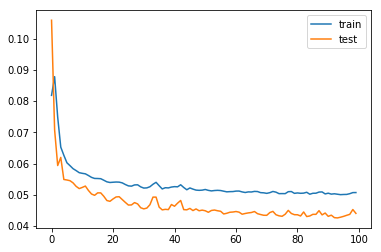

In [108]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [141]:
ypredict = model.predict(test_X)

In [143]:
# inverse transform
def inv_normalization(y):
    inv_y = y
    for i in range(predict_hours):
        #transform to raw shape (, 5)
        y_ = y[:, i]
        y_ = y_.reshape(len(y), 1)
        raw_ = np.concatenate((y_, test_X[:, -4:]), axis=1)
        inv_ = scaler.inverse_transform(raw_)
        inv_y[:, i] = inv_[:, 0]
    return inv_y

In [144]:
test_X = test_X.reshape((test_X.shape[0], lag_hours*n_features))
# invert scaling for forecast
pm25_predict = inv_normalization(ypredict)
# invert scaling for actual
test_y = test_y.reshape(len(test_y), predict_hours)
pm25_actual = inv_normalization(test_y)

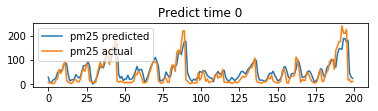

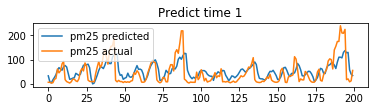

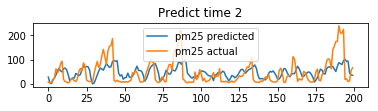

In [151]:
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predict time '+ str(i))
    plt.show()

In [146]:
pm25_predict.shape

(500, 3)

In [142]:
ypredict

array([[0.07403421, 0.07887576, 0.07690275],
       [0.08376514, 0.08284387, 0.07804673],
       [0.08684049, 0.07959783, 0.07127094],
       ...,
       [0.06440486, 0.08039207, 0.0601436 ],
       [0.03982145, 0.05470458, 0.04826782],
       [0.0314076 , 0.04594938, 0.04680354]], dtype=float32)

## 2. consider future meteorology

In [ ]:
# split into train and test sets
values = reframed.values
# Use data of one year as training set
n_train_samples = 1000
n_test_samples = 500
train = values[:n_train_samples, :]
test = values[-n_test_samples:, :]
# split into input and outputs
train_X, train_y = train[:, :lag_hours * n_features], train[:, [-n_features * 3, -n_features * 2, -n_features]]
test_X, test_y = test[:, :lag_hours * n_features], test[:, [-n_features * 3, -n_features * 2, -n_features]]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], lag_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], lag_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)